In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

%matplotlib inline

In [5]:
# Load the dataset
try:
    df = pd.read_csv('Housing.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Housing.csv not found. Please ensure the file is in the correct directory.")
    # You might want to add more robust error handling or exit here in a real script
    exit()

Dataset loaded successfully.


In [6]:
## Data Exploration
print("--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

--- First 5 rows of the dataset ---
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

--- Dataset Information ---
<class 'pandas.core.frame.DataFram

In [7]:
## Correlation Matrix (Numerical Features)
print("\n--- Correlation Matrix ---")
print(df.corr(numeric_only=True)) # Use numeric_only=True to avoid errors with object columns


--- Correlation Matrix ---
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


In [8]:
## Data Preprocessing
# Convert 'yes'/'no' columns to 1/0
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# Apply One-Hot Encoding to 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\n--- Dataset after Preprocessing (first 5 rows) ---")
print(df.head())


--- Dataset after Preprocessing (first 5 rows) ---
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False     

In [9]:
## Independent and Dependent Features
X = df.drop('price', axis=1) # Independent features
Y = df['price'] # Dependent feature

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (545, 13)
Shape of Y: (545,)


In [10]:
## Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (408, 13)
Shape of X_test: (137, 13)
Shape of Y_train: (408,)
Shape of Y_test: (137,)


In [11]:
## Feature Scaling (Standardization)
# Identify numerical features for scaling
numerical_features_for_scaling = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create a preprocessor to apply StandardScaler to numerical features
# and pass through the one-hot encoded categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', 'passthrough', [col for col in X.columns if col not in numerical_features_for_scaling])
    ])

# Create a pipeline that first preprocesses the data and then applies Linear Regression
regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

# Fit the model to the training data
print("Training the Linear Regression model...")
regression_model.fit(X_train, Y_train)
print("Model training complete.")


Training the Linear Regression model...
Model training complete.


In [18]:
import pickle
# It's good practice to re-import the necessary components even in the saving script
# This ensures that the pickle file correctly references these classes when loaded later.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Save the trained pipeline model
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(regression_model, file)

print("Model 'regression_model' saved successfully as house_price_model.pkl")

Model 'regression_model' saved successfully as house_price_model.pkl


In [12]:
## Model Coefficients and Intercept
linear_regressor = regression_model.named_steps['regressor']

print(f"Model Coefficients: {linear_regressor.coef_}")
print(f"Model Intercept: {linear_regressor.intercept_}")

Model Coefficients: [ 528390.85165055   54747.73403608  539196.00718997  331287.78808125
  217159.26062538  372650.91306051  270917.18289615  401008.77558814
  691330.60646909  768994.68598486  627423.31246911 -177801.37946355
 -412019.55299709]
Model Intercept: 4015740.340811796


In [13]:
## Prediction for Test Data
Y_pred = regression_model.predict(X_test)
print("--- Predictions for Test Data (first 10) ---")
print(Y_pred[:10])

--- Predictions for Test Data (first 10) ---
[5244464.09789219 7224189.7855968  3091382.96597727 4548783.6943117
 3321777.04562291 3571591.21018106 5701998.80272434 6450380.43428237
 2822476.53621804 2646984.65280891]


In [14]:
## Performance Metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
n = len(Y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

Mean Squared Error (MSE): 1552389233075.05
Mean Absolute Error (MAE): 915955.89
Root Mean Squared Error (RMSE): 1245949.13
R-squared (R2): 0.6631


In [15]:
## OLS Linear Regression (using statsmodels for detailed summary)
# Apply preprocessing to X_train for statsmodels
X_train_scaled_sm = regression_model.named_steps['preprocessor'].fit_transform(X_train)

# Convert to DataFrame to retain column names for better summary
feature_names_out = []
for name, transformer, cols in regression_model.named_steps['preprocessor'].transformers:
    if transformer == 'passthrough':
        feature_names_out.extend(cols)
    elif hasattr(transformer, 'get_feature_names_out'):
        # For StandardScaler, get_feature_names_out might not be directly applicable for original names
        # So, we'll just use the original column names for numerical features
        if name == 'num':
            feature_names_out.extend(numerical_features_for_scaling)
        else:
            feature_names_out.extend(transformer.get_feature_names_out(cols))
    else:
        feature_names_out.extend(cols)

X_train_scaled_df = pd.DataFrame(X_train_scaled_sm, columns=feature_names_out, index=X_train.index)

# Convert boolean columns to integer type (as you already had)
for col in X_train_scaled_df.columns:
    if X_train_scaled_df[col].dtype == bool:
        X_train_scaled_df[col] = X_train_scaled_df[col].astype(int)

# Explicitly convert all columns to float to ensure numeric type for statsmodels
X_train_scaled_df = X_train_scaled_df.astype(float)


X_train_sm = sm.add_constant(X_train_scaled_df) # Add a constant (intercept)
model_ols = sm.OLS(Y_train, X_train_sm).fit()

print("--- OLS Regression Results (using statsmodels) ---")
print(model_ols.summary())

--- OLS Regression Results (using statsmodels) ---
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     65.60
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           5.52e-90
Time:                        12:49:28   Log-Likelihood:                -6212.5
No. Observations:                 408   AIC:                         1.245e+04
Df Residuals:                     394   BIC:                         1.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [16]:
## Prediction for new data (example)
new_house_data = pd.DataFrame([[\
    6000, # area
    3,    # bedrooms
    2,    # bathrooms
    2,    # stories
    'yes', # mainroad
    'no', # guestroom
    'yes', # basement
    'no', # hotwaterheating
    'yes', # airconditioning
    1,    # parking
    'yes', # prefarea
    'semi-furnished' # furnishingstatus
]],
columns=[\
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',\
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',\
    'furnishingstatus'\
])

# Apply the same preprocessing steps to the new data
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    new_house_data[col] = new_house_data[col].apply(lambda x: 1 if x == 'yes' else 0)

new_house_data_processed = pd.get_dummies(new_house_data, columns=['furnishingstatus'], drop_first=True)

# Align columns with the training data (X)
missing_cols = set(X.columns) - set(new_house_data_processed.columns)
for c in missing_cols:
    new_house_data_processed[c] = 0 # Add missing columns with 0

new_house_data_processed = new_house_data_processed[X.columns] # Ensure column order

# Predict using the trained pipeline
predicted_price = regression_model.predict(new_house_data_processed)

print(f"Predicted price for the new house: ₹{predicted_price[0]:,.2f}")

Predicted price for the new house: ₹7,377,755.76


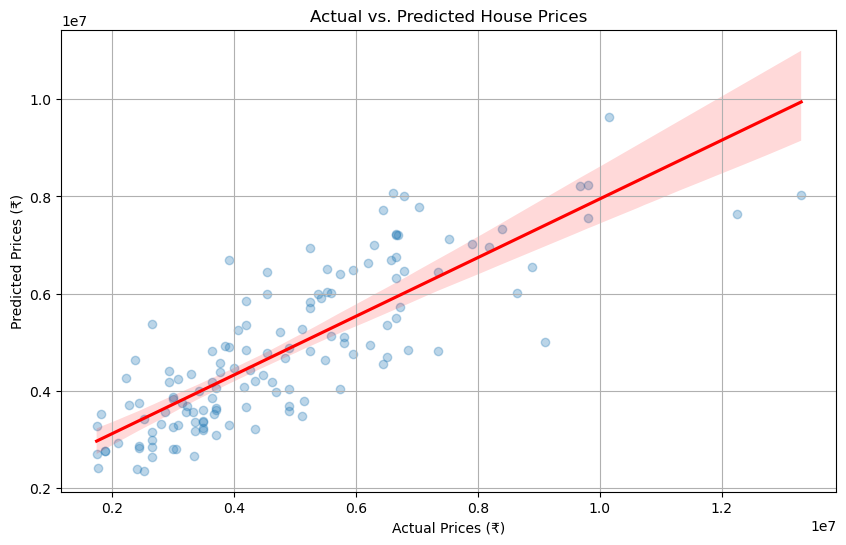

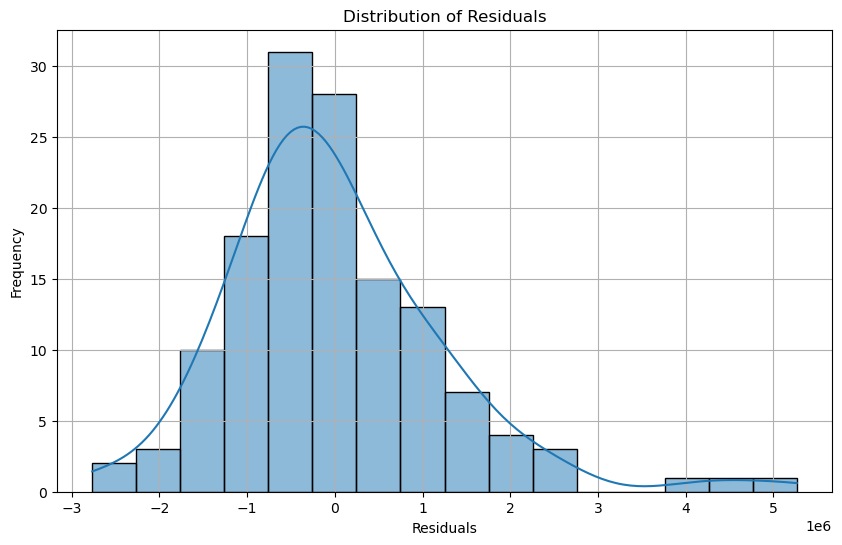

In [17]:
## Visualization of Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Prices (₹)")
plt.ylabel("Predicted Prices (₹)")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

## Distribution of Residuals
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()